<a href="https://colab.research.google.com/github/Dr-Sanjay/Machine-Learning/blob/main/Health_insurance_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Datasets/Health_insurance_cost.xlsx")
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe(include='all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
#Filling missing values with mean and median
df['age'].fillna(df['age'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['health_insurance_price'].fillna(df['health_insurance_price'].mean(), inplace=True)

In [ ]:
df.gender = df.gender.astype('category')
df.smoking_status = df.smoking_status.astype('category')
df.location = df.location.astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     1338 non-null   float64 
 1   gender                  1338 non-null   category
 2   BMI                     1338 non-null   float64 
 3   Children                1338 non-null   int64   
 4   smoking_status          1338 non-null   category
 5   location                1338 non-null   category
 6   health_insurance_price  1338 non-null   float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 46.3 KB


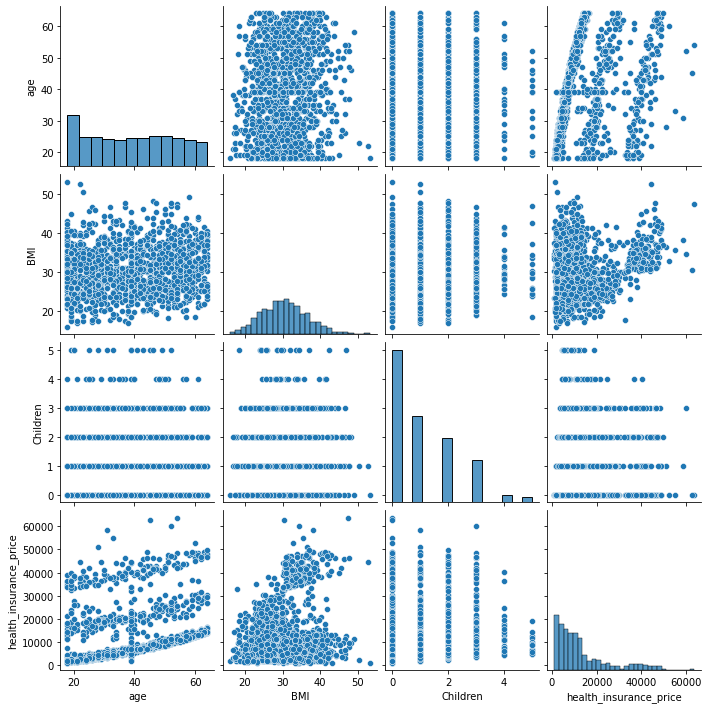

In [ ]:
sns.pairplot(df)
plt.show()

#Data Exploration

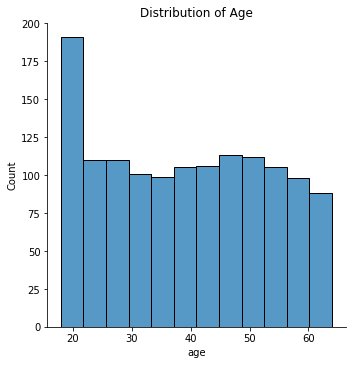

In [ ]:
# distribution of age variable

sns.displot(df['age'])
plt.title('Distribution of Age')
plt.show()

In [ ]:
gender_count = df['gender'].value_counts(dropna = False)
gender_count

male      676
female    662
Name: gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

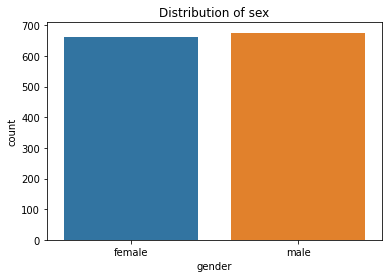

In [ ]:
# plot of sex variables

sns.countplot(x = 'gender', data = df)
plt.title('Distribution of sex')
plt.show

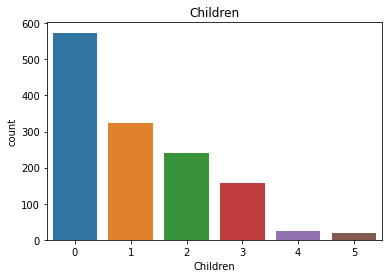

In [ ]:
# plot of children variable

sns.countplot(x = 'Children', data = df)
plt.title('Children')
plt.show()
#According to the figure, there are more number of people with no children. Then there are people having 1-3 children and there are very less people having 4-5 children

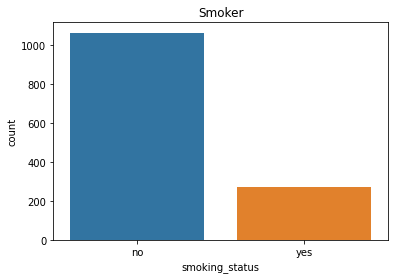

In [ ]:
# plot of smoker variable

sns.countplot(x = 'smoking_status', data = df)
plt.title('Smoker')
plt.show()

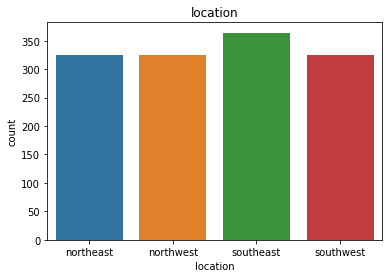

In [ ]:
# plot of region variable

sns.countplot(x = 'location', data = df)
plt.title('location')
plt.show()

#Bivariate/Multivariate Analysis

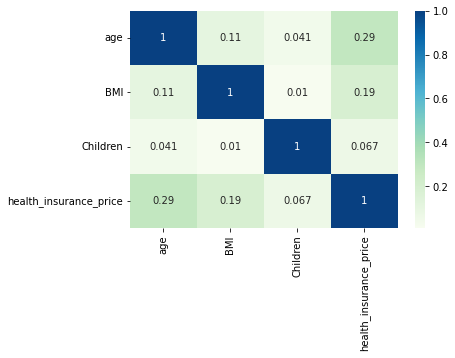

In [ ]:
correlation=df.corr(method='pearson')
Corr_Heatmap=sns.heatmap(correlation,annot=True,cmap="GnBu")

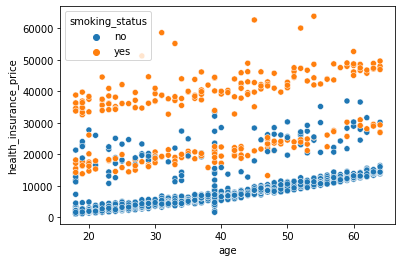

In [ ]:
sns.scatterplot(df,x='age',y='health_insurance_price',hue='smoking_status')
plt.show()

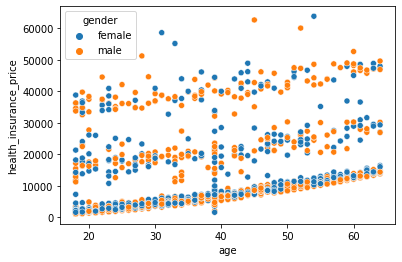

In [ ]:
sns.scatterplot(df,x='age',y='health_insurance_price',hue='gender')
plt.show()

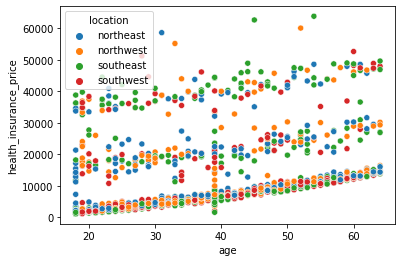

In [ ]:
sns.scatterplot(df,x='age',y='health_insurance_price',hue='location')
plt.show()

# Data Preprocessing

In [ ]:
# Categorical features: gender, Smoker, and Region.

data = df.copy()

# Assigning values for 'smoker' feature

data['smoking_status'] = data['smoking_status'].map({'yes':1, 'no':0})

data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.638217,0,1,southwest,16884.92400
1,18.0,male,33.770000,1,0,southeast,1725.55230
2,28.0,male,33.000000,3,0,southeast,4449.46200
3,33.0,male,22.705000,0,0,northwest,21984.47061
4,32.0,male,28.880000,0,0,northwest,3866.85520


In [ ]:
# As we know that 'gender' and 'location' are nominal categorical variables
# We will create dummy variable

dummies = pd.get_dummies(data['gender'])

# Let's have a look

dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [ ]:
# One-Hot Encoder
# We will use this method to feed this feature to the machine

ohe = OneHotEncoder()

feature_array = ohe.fit_transform(data[['location']]).toarray()

In [ ]:
# Let's see the following categories in column region

feature_labels = ohe.categories_

print(feature_labels)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [ ]:
# Creating one array

feature_labels = np.array(feature_labels).ravel()

print(feature_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [ ]:
# We are now making a data frame of these labels

features = pd.DataFrame(feature_array, columns = feature_labels)

features.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [ ]:
# We will now join the dummy variable and OHE columns to original dataset

data_new = pd.concat([data, dummies, features], axis=1)

data_new = data_new.drop(columns='location', axis=1)
data_new = data_new.drop(columns='gender', axis=1)

data_new.head()

,age,BMI,Children,smoking_status,health_insurance_price,female,male,northeast,northwest,southeast,southwest
0,19.0,30.638217,0,1,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1,0,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28.0,33.000000,3,0,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33.0,22.705000,0,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32.0,28.880000,0,0,3866.85520,0,1,0.0,1.0,0.0,0.0


In [ ]:
# declare the variables

y = data_new.health_insurance_price
x = data_new.drop(columns='health_insurance_price', axis=1)

In [ ]:
# let's have a look at the target variables

print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1338, dtype: float64


In [ ]:
# let's have a look at the features

print(x)

       age        BMI  Children smoking_status  female  male  northeast  \
0     19.0  30.638217         0              1       1     0        0.0   
1     18.0  33.770000         1              0       0     1        0.0   
2     28.0  33.000000         3              0       0     1        0.0   
3     33.0  22.705000         0              0       0     1        0.0   
4     32.0  28.880000         0              0       0     1        0.0   
...    ...        ...       ...            ...     ...   ...        ...   
1333  50.0  30.970000         3              0       0     1        0.0   
1334  18.0  31.920000         0              0       1     0        1.0   
1335  18.0  36.850000         0              0       1     0        0.0   
1336  21.0  25.800000         0              0       1     0        0.0   
1337  61.0  29.070000         0              1       1     0        0.0   

      northwest  southeast  southwest  
0           0.0        0.0        1.0  
1           0.0    

#Splitting Data into Training & testing set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
# By looking at the shape, we could see the number of observations which are training and testing

print(x.shape, x_train.shape, x_test.shape)

(1338, 10) (1070, 10) (268, 10)


#Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression()

LR_model = LR.fit(x_train,y_train)
ypred_LR = LR.predict(x_test)

LR1 = r2_score(y_test,ypred_LR)
LR1

0.7442385664835155

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
dt_model = DT.fit(x_train,y_train)
ypred_dt = DT.predict(x_test)
d1=r2_score(y_test,ypred_dt)
d1

0.6807606928319171

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
model_RF = RF.fit(x_train,y_train)
ypred_rf = RF.predict(x_test)

r1=r2_score(y_test,ypred_rf)
r1

0.8399869181534764

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
PF = PolynomialFeatures()
model_pf = PF.fit(x_train, y_train)
x_polynom = PF.fit_transform(x_train)
x_test_poly =PF.fit_transform(x_test)
lin = LinearRegression()
lin.fit(x_polynom, y_train)

y_pred_poly = lin.predict(x_test_poly)

p1=r2_score(y_test,y_pred_poly)
p1

0.8378636329289771

#Conclusion:-- out of the four Machine Learning Algorithms Random forest Regressor has highest accuracy.